# Homework1 : 25/06/2018

###  Problem 1. Modify the square lattice given in pybinding notebook by adding a second B basis atom displaced at an arbitrary b = (b_x , b_y ) of your choice. Define the A → B hopping term to be t = 2. Represent graphically the resulting lattice.

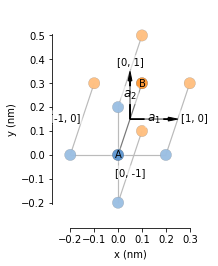

In [5]:
import pybinding as pb
import matplotlib.pyplot as plt

d = 0.2  # [nm] unit cell length
t = 1    # [eV] hopping energy
tab = 2

# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[d, 0], a2=[0, d])
lattice.add_sublattices(
    ('A', [0, 0]),  # add an atom called 'A' at position [0, 0]
    ('B', [0.1, 0.3])
)
lattice.add_hoppings(
    # (relative_index, from_sublattice, to_sublattice, energy)
    ([0, 1], 'A', 'A', t),
    ([1, 0], 'A', 'A', t),
    ([0, 0], 'A', 'B', tab)
)

lattice.plot()  # plot the lattice that was just constructed
plt.show()      # standard matplotlib show() function

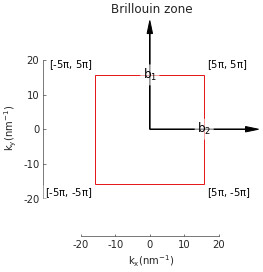

In [69]:
lattice.plot_brillouin_zone()
plt.title("Brillouin zone")
plt.show()

###  Problem 2. Write a short function to generate a square lattice with an arbitrary basis atom B whose relative position with respect to A can be defined at input. Plot the resulting lattices for two arbitrary choices of b.

In [70]:
import numpy as np
import pybinding as pb
import matplotlib.pyplot as plt


def newBasis(bx,by):
    d = 0.2  # [nm] unit cell length   ## Decides the axes length
    t = 1    # [eV] hopping energy
    tab = 2
    # create a simple 2D lattice with vectors a1 and a2
    lattice = pb.Lattice(a1=[d, 0], a2=[0, d])  
    lattice.add_sublattices(
        ('A', [0, 0]) , # add an atom called 'A' at position [0, 0]
        ('B', [0+bx, 0+by])
    )
    lattice.add_hoppings(
    # (relative_index, from_sublattice, to_sublattice, energy)
         ([0, 1], 'A', 'A', t),
         ([1, 0], 'A', 'A', t),
         ([0, 0], 'A', 'B', tab)
     )
     
    fig = plt.figure()  
    plt.figure()
    lattice.plot()  # plot the lattice that was just constructed
    plt.show()      # standard matplotlib show() function
    return fig
    

<Figure size 432x288 with 0 Axes>

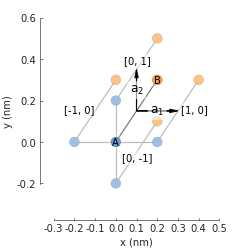

<Figure size 432x288 with 0 Axes>

In [71]:
newBasis(0.2,0.3)

<Figure size 432x288 with 0 Axes>

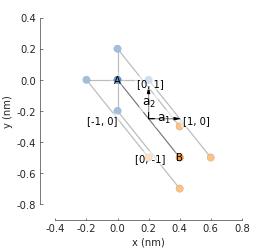

<Figure size 432x288 with 0 Axes>

In [76]:
newBasis(0.4,-0.5)

###  Problem 3. What are the definitions of a reciprocal lattice and a Brillouin zone? Write down the formulas that relate the lattice vectors with the corresponding reciprocal lattice. Calculate the area of the Brillouin zone of the square lattice in Problem 1.

Reciprocal Lattice:
Reciprocal space is also called as momentum space in contrast to real space.
The reciprocal space lattice is a set of imaginary points constructed in such a way that the direction of a vector from one point to another coincides with the direction of a normal to the real space planes and the separation of those points (absolute value of the vector) is equal to the reciprocal of the real interplanar distance.

Brillouin zone:
The first Brillouin zone is a uniquely defined primitive cell in reciprocal space. 
In the same way as the Bravais lattice is divided up into Wigner–Seitz cells in the real lattice, the reciprocal lattice is divided up into Brillouin zones.

Relation between the real lattice vectors(R_n) with the corresponding reciprocal lattice vectors(G_m) is:

$$\mathbf{G}_m \cdot \mathbf{R}_n = 2\pi N, where N \in \mathbb{Z}$$


Area of the Brillouin zone in Problem1:

The side of the squared Brillouin zone is: 10*pi nm^-1
So the area of the Brillouin zone is : (bx)^2 = 100*pi^2 nm^-2
                                            

###  Problem 4. Modify the following example code provided in the python notebook such that it generates automatically the lattice vector of a rectangular lattice with lattice vectors a_1 = (2, 0) and a_2 = (0, 1) with and without a basis atom B. Illustrate the resulting lattice and the associated Brillouin zone.

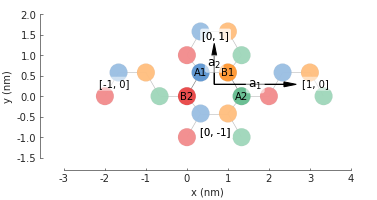

In [79]:
"""Create and plot a monolayer graphene lattice and it’s Brillouin zone"""
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
pb.pltutils.use_style()


def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = a/np.sqrt(3) #0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[2,0],
                     a2=[0,1])
    
    lat.add_sublattices(('A1', [1/3,1/np.sqrt(3) ]),
                        ('B1', [1 , 1/np.sqrt(3) ]),
                        ('A2', [ 4/3 , 0 ]),
                        ('B2', [ 0 , 0 ]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A1', 'B1', t),
        # between neighboring cells
        ([0, 0], 'B2', 'A1', t),
        ([0, 0], 'B1', 'A2', t),
        ([0, -1], 'B2', 'A1', t),
        ([0, -1], 'A2', 'B1', t),
        ([-1, 0], 'B2', 'A2', t),
       )
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.show()


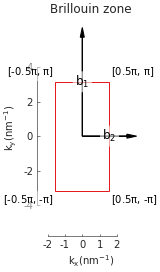

In [80]:
lattice.plot_brillouin_zone()
plt.title("Brillouin zone")
plt.show()